In [40]:
import numpy as np
import scipy.stats as sp
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 확률분포(Probability Distribution)

### 실습01 - p12
- 정규분포 / 표준정규분포

array([31.179, 27.023, 33.582, ..., 32.576, 26.347, 31.613])

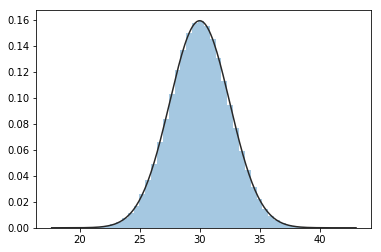

In [41]:
np.random.seed(seed=1234)
normal = np.random.normal(30,2.5,1000000)
sns.distplot(normal, fit=stats.norm, kde=False)

normal.round(3)

### 실습02 - p14
- 정규분포 / 표준정규분포

In [42]:
mu = 175
sigma = 5
x = 180
prop = stats.norm.cdf(x, mu, sigma)
print("{0}내 키의 위치 : {1:.1f}%".format(x,(prop) * 100))

180내 키의 위치 : 84.1%


### 실습03 - p15
- 정규분포 / 표준정규분포

In [43]:
#1, 12Km이상 15Km이하를 달릴 확률
mu = 12
sigma = 3
x = 12
y = 15
z = 9
prop = stats.norm.cdf(y, mu, sigma)

#2
#9km 이상 15km 이하를 달릴 확률은 얼마인가
prop2 = stats.norm.cdf(x, mu, sigma)

#3
#15km 이상를 달릴 확률은 얼마인가
prop3 = stats.norm.cdf(z, mu, sigma)

print("1리터를 가지고  {0}km 이상 {1}km 이하 달릴 확률 : {2:.1f}%".format(x,y,(prop - prop2) * 100))
print("1리터를 가지고  {0}km 이상 {1}km 이하 달릴 확률 : {2:.1f}%".format(z,y,(prop - prop3) * 100))
print("1리터를 가지고  {0}km 이상 달릴 확률 : {1:.1f}%".format(y,(1 - prop) * 100))

1리터를 가지고  12km 이상 15km 이하 달릴 확률 : 34.1%
1리터를 가지고  9km 이상 15km 이하 달릴 확률 : 68.3%
1리터를 가지고  15km 이상 달릴 확률 : 15.9%


### 실습04 - p17
- 정규분포 / 표준정규분포

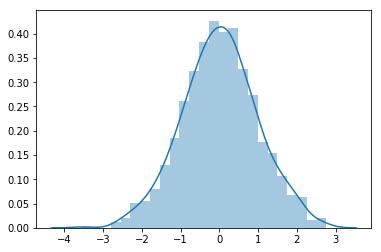

In [44]:
np.random.seed(seed = 1234)
normal = np.random.normal(0,1,1000)
sns.distplot(normal)


### 실습05 - p19
- t분포

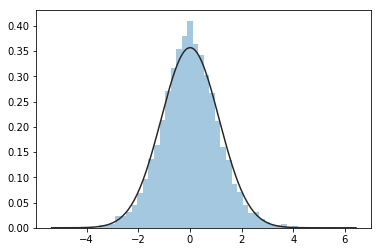

In [45]:
np.random.seed(seed=1234)
t_df29 = np.random.standard_t(df = 10, size = 10000)
sns.distplot(t_df29, fit = stats.norm, kde = False)



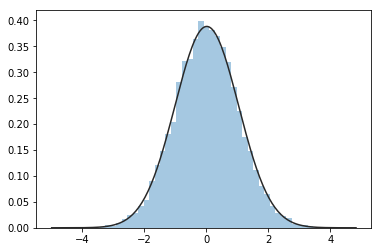

In [46]:
t_df29_2 = np.random.standard_t(df = 50, size = 10000)
sns.distplot(t_df29_2, fit = stats.norm, kde = False)

### 실습06 - p21
- t분포

In [47]:
t = 2.0
df = 10

prop = stats.t.cdf(t,df)
print("P(T<={0}):{1:.3f}".format(t,prop))

P(T<=2.0):0.963


### 실습07 - p23
- x^2 분포(카이스퀘어)

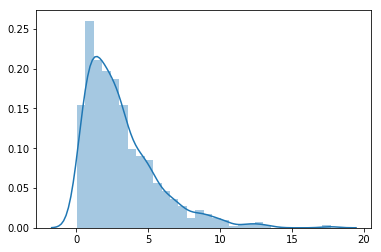

In [48]:
np.random.seed(seed = 1234)
chisq_df10 = np.random.chisquare(df = 3, size = 1000)
sns.distplot(chisq_df10, kde = True)

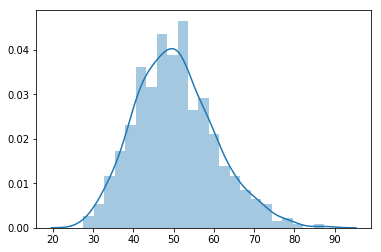

In [49]:
np.random.seed(seed = 1234)
chisq_df10 = np.random.chisquare(df = 50, size = 1000)
sns.distplot(chisq_df10, kde = True)

### 실습08 - p25
- x^2 분포(카이스퀘어)

In [50]:
chisq = 3.0
df = 8

prop = stats.chi2.cdf(chisq, df)
print("P(X<={}):{:.6f}".format(chisq, prop))

P(X<=3.0):0.065642


### 실습09 - p27
- F분포

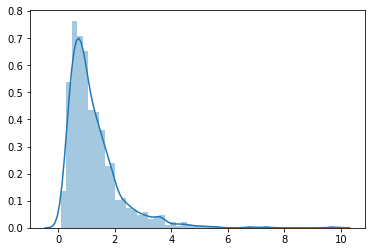

In [51]:
np.random.seed(seed = 1234)
F_df10_10 = np.random.f(dfnum = 10, dfden = 10, size = 1000)
sns.distplot(F_df10_10, kde = True)

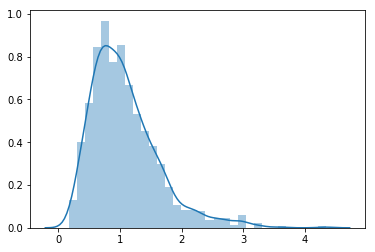

In [52]:
np.random.seed(seed = 1234)
F_df10_10 = np.random.f(dfnum = 10, dfden = 50, size = 1000)
sns.distplot(F_df10_10, kde = True)

### 실습10 - p30
- 와이블 분포

In [53]:
x = 2500
alpha = 5.2
beta = 2200

prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={}): {:.5f}".format(x,(1-prop)))

P(X>=2500): 0.14313


### 실습11 - p35
- 이항 분포

In [54]:
n = 5
for i in range(n + 1):
    prop = stats.binom.pmf(k= i, n = n, p = 0.3)
    print("P(X={}) = {:.3f}".format(i, prop))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 실습12 - p37
- 포아송 분포

In [55]:
mu = 2
prop = stats.poisson.pmf(2,mu)
cdf_prop = stats.poisson.cdf(1,mu)
cdf_prop2 = stats.poisson.cdf(3,mu)

print("{}명의 손님이 도착할 확률:{:.4f}".format(2,prop))
print("{}명 이하의 손님이 도착할 확률:{:.4f}".format(1,cdf_prop))
print("{}명 이하의 손님이 도착할 확률:{:.4f}".format(2,(1-cdf_prop2)))

2명의 손님이 도착할 확률:0.2707
1명 이하의 손님이 도착할 확률:0.4060
2명 이하의 손님이 도착할 확률:0.1429


---

# 기술통계(Descriptive Statistics)

- 중심
    - 산술평균, 중앙값, 최빈값
- 산포
    - Range, 분산, 표준편차
    
- 범주형 데이터에 계산
    - counts, percents, cumulative counts, cumulative percents

### 실습 13 - p42

In [56]:
mycars = pd.read_csv("./data/pre/mycars.csv")
df = mycars[['manufacturer','mpg']]
df.groupby('manufacturer').describe()

mpg                                                    
             count       mean       std   min   25%   50%    75%   max
manufacturer                                                          
audi          18.0  17.611111  1.974511  15.0  16.0  17.5  18.75  21.0
chevrolet     19.0  15.000000  2.924988  11.0  13.5  15.0  16.50  22.0
dodge         37.0  13.135135  2.485091   9.0  11.0  13.0  15.00  18.0
ford          25.0  14.000000  1.914854  11.0  13.0  14.0  15.00  18.0
honda          9.0  24.444444  1.943651  21.0  24.0  24.0  25.00  28.0
hyundai       14.0  18.642857  1.499084  16.0  18.0  18.5  19.75  21.0
jeep           8.0  13.500000  2.507133   9.0  12.5  14.0  15.00  17.0
land rover     4.0  11.500000  0.577350  11.0  11.0  11.5  12.00  12.0
lincoln        3.0  11.333333  0.577350  11.0  11.0  11.0  11.50  12.0
mercury        4.0  13.250000  0.500000  13.0  13.0  13.0  13.25  14.0
nissan        13.0  18.076923  3.426892  12.0  15.0  19.0  19.00  23.0
pontiac        5.0  17.000000  1.000000  16.0  16.0  17.0  18.00  18.0
subaru        14.0  19.285714  0.913874  18.0  19.0  19.0  20.00  21.0
toyota        34.0  18.529412  4.046961  11.0  15.0  18.0  21.00  28.0
volkswagen    27.0  20.925926  4.556702  16.0  18.5  21.0  21.00  35.0

In [57]:
mycars = pd.read_csv("./data/pre/mycars.csv")
df = mycars[['automatic','mpg']]
df.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

---

### 실습14 - p45
- mpg(연비)와 모델에 따른 counts, percents, cumulative counts, cumulative percents를 계산

In [58]:
mycars = pd.read_csv("./data/pre/mycars.csv")
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [59]:
df = mycars[['model','mpg']]
df.head()

,model,mpg
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16


In [60]:
count = df['model'].value_counts().sort_index()
count.head()

4runner 4wd    6
a4             7
a4 quattro     8
a6 quattro     3
altima         6
Name: model, dtype: int64

In [61]:
cumcnt = np.cumsum(count)
cumcnt.head()

4runner 4wd     6
a4             13
a4 quattro     21
a6 quattro     24
altima         30
Name: model, dtype: int64

In [62]:
percent = count/sum(count)*100
percent.head()

4runner 4wd    2.564103
a4             2.991453
a4 quattro     3.418803
a6 quattro     1.282051
altima         2.564103
Name: model, dtype: float64

In [63]:
cumpct = np.cumsum(percent)
cumpct.head()

4runner 4wd     2.564103
a4              5.555556
a4 quattro      8.974359
a6 quattro     10.256410
altima         12.820513
Name: model, dtype: float64

In [64]:
count_data = pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.head()

,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513


In [65]:
count_data.columns.name= "Model"
count_data

Model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


---

# 추론통계 (Inferencial Statistics)

### 실습15 - p60

In [66]:
df2 = pd.DataFrame({'감자무게':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
lower, upper = stats.norm.interval(0.95, loc = df2.mean(), scale = stats.sem(df2))
print("신뢰구간 : ({},{})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([18.8],[20.2])


### 실습16 - p62
- 모평균 신뢰구간 추정 - 모표준편차를 모르는 경우

In [67]:
df4 = pd.DataFrame({'product' : [73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
lower, upper = stats.t.interval(0.95, len(df4)-1, loc = np.mean(df4), scale = stats.sem(df4))
print("신뢰구간 : ({}, {})".format(lower.round(2), upper.round(2)))

신뢰구간 : ([70.6], [72.4])


### 실습17 - p64
- 1-sample t-test

In [68]:
df = pd.DataFrame({'sample':[85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
t_result = stats.ttest_1samp(df, 76.7)
t,p = t_result.statistic.round(4), t_result.pvalue.round(4)
# t,p = t_result.statistic, t_result.pvalue
print("1-Sample t-test")
print("t검정통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t검정통계량 : [4.8786]
p-value : [0.0009]


> 유의수준 5%에서 검정결과 `P값이 0.0009`임으로 개선활동이 만족도를 `변화 시켰다`고 볼 수 있다

### 실습18 - p68
- Paired t-test

In [69]:
df1 = pd.DataFrame({'A':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'B':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result = stats.ttest_rel(df1, df2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print("t검정통계량 : {}".format(t))
print("P-value : {}".format(p))

Paired t-test
t검정통계량 : [-2.266]
P-value : [0.05]


> 유의수준 5%에서 검정결과 `P값이 0.05`임으로 회사원들의 영어성적이 학원 전후로 `차이가 있다`고 볼 수 있다.

### 실습19 - p71
 - 1 Propotion test

In [70]:
count = 10
nobs = 100
value = .2

stat, pval = proportions_ztest(count,nobs,value)

print("1 Proportion test")
print('p 검정통계량 : {:0.3f}'.format(stat))
print('p value : {:0.3f}'.format(pval))

1 Proportion test
p 검정통계량 : -3.333
p value : 0.001


> 결과적으로 품질개선을 한결과 차이가 있다고 할 수 있다.

### 실습20 - p73
- 2 Propotion test

In [71]:
count = np.array([14,5])
nobs = np.array([1200,1200])
stat, pval = proportions_ztest(count, nobs)

print("2 Proportion test")
print('p 검정통계량 : {:0.3f}'.format(stat))
print('p value : {:0.3f}'.format(pval))

2 Proportion test
p 검정통계량 : 2.073
p value : 0.038


---

### 실습21 - p75
- 카이제곱 검정(chi-square test)

In [72]:
df = pd.DataFrame({'A/S':[18,8,4,4,3,3], '가격':[1,2,1,1,1,25], 
                   '성능':[8,14,3,2,3,8], '확장성':[7,5,4,3,1,10],
                  '디자인':[10,5,9,2,1,10], '안정성':[9,9,5,7,1,1],
                  '기능성':[10,4,4,3,1,7]})
chi, pval, dof, expected = stats.chi2_contingency(df.T)

print("chi-square test")
print('chisq:{:0.3f}'.format(chi))
print('p:{:0.03f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:87.785
p:0.000
degree pf freedom: 30
expected value: 
[[10.633  7.932  5.063  3.713  1.857 10.802]
 [ 8.241  6.148  3.924  2.878  1.439  8.371]
 [10.101  7.536  4.81   3.527  1.764 10.262]
 [ 7.975  5.949  3.797  2.785  1.392  8.101]
 [ 9.835  7.338  4.684  3.435  1.717  9.992]
 [ 8.506  6.346  4.051  2.97   1.485  8.641]
 [ 7.709  5.751  3.671  2.692  1.346  7.831]]


> 차이가 있다고 할 수 있다.

---

# 상관, 회귀분석(Correlation, Regression)

1. 상관분석
    - 산점도, 상관관계 vs 카이제곱(차이는 데이터유형임)
2. 회귀분석
    - 단순선형회귀분석(Simple Linear Regression)

### 실습22 - p 80

In [73]:
Strength = [37.6, 38.6, 37.2, 36.34, 38.6, 39,37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
Temperature = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr, pval = sp.stats.pearsonr(Strength, Temperature)

print("correlation Analysis")
print('crr:{:0.3f}'.format(corr))
print('p:{:0.3f}'.format(pval))

correlation Analysis
crr:-0.723
p:0.000


### 실습 23 - p84
- Simple Liner Regression

In [74]:
Strength = [37.6, 38.6, 37.2, 36.34, 38.6, 39,37.2, 36.1, 35.9, 37.1, 
            36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]

BackingTime = [0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 
               0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 
               0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]

Strength = sm.add_constant(Strength)
model = sm.OLS(BackingTime, Strength)
result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.96
Date:                Thu, 02 May 2019   Prob (F-statistic):           1.92e-05
Time:                        16:33:48   Log-Likelihood:                 46.542
No. Observations:                  20   AIC:                            -89.08
Df Residuals:                      18   BIC:                            -87.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.135      0.020      0.9